# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [4]:
pd.set_option('display.max_columns', None)
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
websites.tail()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0
1780,B0_676,249,40,utf-8,Microsoft-IIS/8.5,24435.0,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,19,6,11,2314,25,28,3039,2776,25,6.0,0


#### Comments about the dataset
- The identification of *benign vs malicious* is done by the 'URL' column: first letter (either 'B' or 'M' respectively) and this also corresponds to column 'Type' (either 0 or 1 respectively).
- At first sight, I would consider the following features for the website: *URL_length, Number_Special_Characters, Charset, Server, Content_length, Country, Registered and Updated Dates, Dist_TCP_Port, Remote_IPS, Source_Packets, Remote_Packets, Source_bytes, Remote_bytes and DNS_query times*.
- Yes there are categorical columns that need to be converted to numerical, for example: Charset, Server, Country.

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [6]:
# Change dates to numeric ?
# websites_num.WHOIS_REGDATE = pd.to_datetime(websites_num.WHOIS_REGDATE).apply(datetime.toordinal)
# websites_num.WHOIS_UPDATED_DATE = pd.to_datetime(websites_num.WHOIS_UPDATED_DATE).apply(datetime.toordinal)

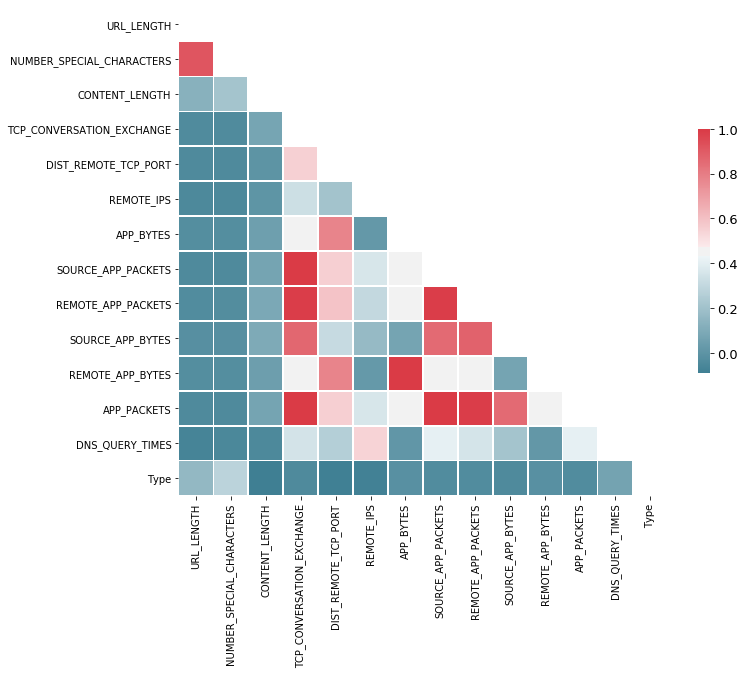

In [7]:
# Your code here
cat_columns = ['URL','CHARSET','SERVER','WHOIS_COUNTRY','WHOIS_STATEPRO','WHOIS_REGDATE','WHOIS_UPDATED_DATE']
websites_num = websites.drop(columns=cat_columns)
# Compute the correlation matrix on numeric variables
corr = websites_num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# careful about the maximum ! -->  
g = sns.heatmap(corr,mask=mask,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# use matplotlib.colorbar.Colorbar object
cbar = g.collections[0].colorbar
# here set the labelsize
cbar.ax.tick_params(labelsize=13)

#### Comments on high collinearity
- We observe that *App_packets* is exactly the same variable as *Source_App_packets* and strongly correlated to *Remote_App_packets* and *TCP_conversation_exchange*. Thus, I would just keep one of these four features to proceed into Machine Learning analysis.
- In addition, *Remote_App_bytes* and *App_bytes* are also near collinearity so I would just keep one of them for the analysis.
- I might also need to consider removing collinearity between *Url_length* and *Number_Special_Characters*.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [8]:
# Your code here
coll_columns = ['SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','APP_PACKETS','REMOTE_APP_BYTES','URL_LENGTH']
websites_num_LI = websites_num.drop(columns=coll_columns)

# Compute the correlation matrix on numeric variables
corr = websites_num_LI.corr()

# Display maximum correlation coefficient (absolute value)
print(f"Maximum correlation coefficient absolute value is:")

print(np.absolute(np.triu(corr.values,k=1)).max())


Maximum correlation coefficient absolute value is:
0.8655800464278235


#### Comments on handle collinearity
Basically, I conducted the elimination of collinear columns following previous analysis and measuring the maximum absolute value comming from the off-diagonal terms of the correlation matrix, until I reached the point of having a collinearity below 90%.

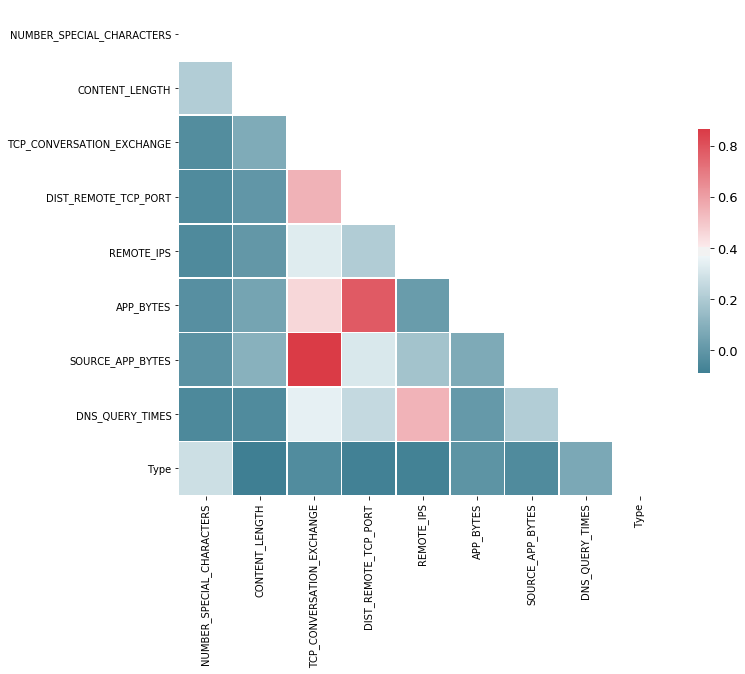

In [9]:
# Print heatmap again

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Get the maximum and minimum values of correlation to set color bar!
max_corr = np.triu(corr.values,k=1).max()
min_corr = np.triu(corr.values,k=1).min()

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr,mask=mask,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .5},vmin=min_corr,vmax=max_corr)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# use matplotlib.colorbar.Colorbar object
cbar = g.collections[0].colorbar
# here set the labelsize
cbar.ax.tick_params(labelsize=13)


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [10]:
# Your code here
prop_nan = websites_num_LI.isna().sum().sort_values(ascending=False)/len(websites_num_LI)*100
print(f"Proportion of NaN values in columns:\n{round(prop_nan,2)}")
# check also zero values (integer & float types)!
prop_0 = (websites_num_LI == 0).sum().sort_values(ascending=False)/len(websites_num_LI)*100
print(f"Proportion of Zero numeric values in columns:\n{round(prop_0,2)}")

Proportion of NaN values in columns:
CONTENT_LENGTH               45.59
DNS_QUERY_TIMES               0.06
Type                          0.00
SOURCE_APP_BYTES              0.00
APP_BYTES                     0.00
REMOTE_IPS                    0.00
DIST_REMOTE_TCP_PORT          0.00
TCP_CONVERSATION_EXCHANGE     0.00
NUMBER_SPECIAL_CHARACTERS     0.00
dtype: float64
Proportion of Zero numeric values in columns:
Type                         87.87
DNS_QUERY_TIMES              54.80
DIST_REMOTE_TCP_PORT         51.43
APP_BYTES                    36.89
REMOTE_IPS                   36.89
TCP_CONVERSATION_EXCHANGE    36.89
SOURCE_APP_BYTES             33.13
CONTENT_LENGTH                0.28
NUMBER_SPECIAL_CHARACTERS     0.00
dtype: float64


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [11]:
# Your code here
# Discard column of content_length (above 45% of NaN)
websites_num_clean = websites_num_LI.drop(columns='CONTENT_LENGTH')
# Drop 1 entry with NaN in 'DNS_QUERY_TIMES'
websites_num_clean = websites_num_clean.dropna()
# Note zero entries in App_Bytes correspond exactly with Remote_IPS and TCP_exchange
# Also their indices correspond
bool1 = websites_num_clean.APP_BYTES != 0
bool2 = websites_num_clean.REMOTE_IPS != 0
bool3 = websites_num_clean.TCP_CONVERSATION_EXCHANGE != 0
print(f"Non zero entries from APP_BYTES coincide with REMOTE_IPS: {bool1.equals(bool2)}")
print(f"Non zero entries from REMOTE_IPS coincide with TCP_EXCHANGE: {bool2.equals(bool3)}")
# Then all zero values from these rows are droped
websites_num_noZero = websites_num_clean.loc[bool1]
# websites_num_noZero = websites_num_clean

Non zero entries from APP_BYTES coincide with REMOTE_IPS: True
Non zero entries from REMOTE_IPS coincide with TCP_EXCHANGE: True


Comments about missing values:
- Column 'CONTENT_LENGTH' discarded (+45% NaN entries).
- Drop an entry with NaN in 'DNS_QUERY_TIMES'
- Drop all zero entries from APP_Bytes also removes zero entries from SOURCE_APP_BYTES, REMOTE_IPS and TCP_CONVERSATION_EXCHANGE

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

Proportion of Zero numeric values in columns:
Type                         86.46
DNS_QUERY_TIMES              28.58
DIST_REMOTE_TCP_PORT         23.06
SOURCE_APP_BYTES              0.00
APP_BYTES                     0.00
REMOTE_IPS                    0.00
TCP_CONVERSATION_EXCHANGE     0.00
NUMBER_SPECIAL_CHARACTERS     0.00
dtype: float64


Text(0.5, 0, 'DIST_REMOTE_TCP_PORT')

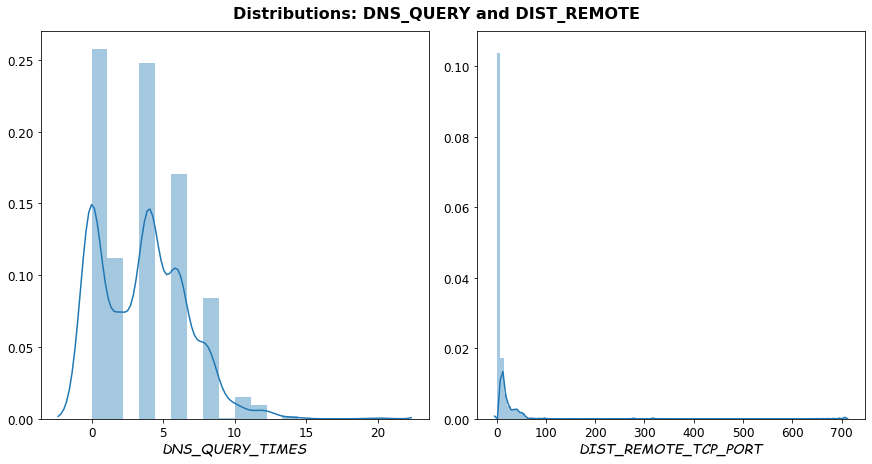

In [12]:
# Examine missing values in each column
# There are still zero values remaining in features
prop_0 = (websites_num_noZero == 0).sum().sort_values(ascending=False)/len(websites_num_noZero)*100
print(f"Proportion of Zero numeric values in columns:\n{round(prop_0,2)}")

# Inspect the distributions from DNS and DIST_REMOTE
fig = plt.figure(figsize=[12,6],constrained_layout=True)
fig.suptitle('Distributions: DNS_QUERY and DIST_REMOTE', size=16, weight='bold',y=1.05)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
sns.distplot(websites_num_noZero.DNS_QUERY_TIMES,ax=ax1,norm_hist=True)
sns.distplot(websites_num_noZero.DIST_REMOTE_TCP_PORT,ax=ax2,norm_hist=True,bins=100)

# Tweak using Matplotlib
plt.sca(ax1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
label_prop = {'size':14,'family':'fantasy','style':'oblique'}
plt.xlabel('DNS_QUERY_TIMES',fontdict=label_prop)
plt.sca(ax2)
plt.ylim(0,0.11)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('DIST_REMOTE_TCP_PORT',fontdict=label_prop)

# print(f"Value counts from DIST_REMOTE_TCP_PORT are:\n{websites_num_noZero.DIST_REMOTE_TCP_PORT.value_counts()}")

In [13]:
# Compare proportion of malignous sites (original vs cleaned)
prop_org = (websites.Type == 1).sum()/len(websites)*100
print(f"From the original dataset, {round(prop_org,2)} % of the site entries were malicious.")
prop_clean = (websites_num_noZero.Type == 1).sum()/len(websites_num_noZero)*100
print(f"After cleaning, {round(prop_clean,2)} % of the site entries are malicious (same proportion almost).")
# I can't eliminate zero entries for DIST_REMOTE_TCP_PORT even if the distribution is hihgly skewed
# It will change the proportion of malignous sites contained in the original dataset
idx = websites_num_noZero.DIST_REMOTE_TCP_PORT == 0
prop_malig_dist_zero = websites_num_noZero[idx].Type.sum()/idx.sum()*100
print(f"{round(prop_malig_dist_zero,2)} % of websites with DIST_REMOTE_TCP_PORT are malignous, thus I keep those entries.")

From the original dataset, 12.13 % of the site entries were malicious.
After cleaning, 13.54 % of the site entries are malicious (same proportion almost).
34.36 % of websites with DIST_REMOTE_TCP_PORT are malignous, thus I keep those entries.


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [14]:
# Your code here
# Work only over the clean indexes already
countries = websites.WHOIS_COUNTRY.loc[websites_num_noZero.index]
print(f"Value counts in WHOIS_COUNTRY (only for numerical clean entries):\n{countries.value_counts()}")

# Unify some country codes. [ ('se', 'SE'), ('United Kingdom','UK') ] --> already cleaned
mapping = [('Cyprus','CY'), ('us','US'), ("[u'GB'; u'UK']",'UK'), ('GB','UK'), ('ru', 'RU')]
for k, v in mapping:
    countries = countries.replace(k,v)

print(f"Value counts in WHOIS_COUNTRY with consistent codes:\n{countries.value_counts()}")

idx = countries == 'None'
prop_malig_none_country = websites_num_noZero[idx].Type.sum()/idx.sum()*100
print(f"{round(prop_malig_none_country,2)} % of websites with country 'None' are malignous, thus I keep those entries.")


Value counts in WHOIS_COUNTRY (only for numerical clean entries):
US                662
None              252
CA                 49
AU                 19
GB                 13
PA                 11
CN                  9
ES                  9
CZ                  9
IN                  8
JP                  8
FR                  6
UK                  5
ru                  4
NL                  4
CH                  4
KR                  4
PH                  3
BS                  3
SC                  3
KG                  2
Cyprus              2
AT                  2
RU                  2
UY                  2
SE                  2
NO                  2
BR                  2
HK                  2
[u'GB'; u'UK']      2
BE                  2
UA                  2
IE                  1
BY                  1
TH                  1
IT                  1
us                  1
TR                  1
LV                  1
UG                  1
SI                  1
IL                  1
PK        

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

Text(0, 0.5, 'Frequencies')

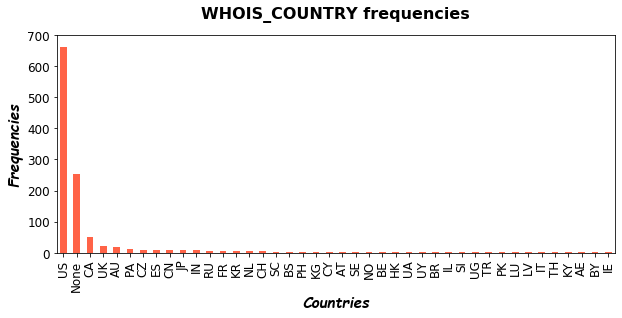

In [15]:
# Your code here

plt.figure(figsize=[10,4])
plot_bar = countries.value_counts().plot.bar(color='tomato')
plt.title('WHOIS_COUNTRY frequencies', size=16, weight='bold',y=1.05)

plt.sca(plot_bar)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,700)
label_prop = {'size':15,'weight':'bold','family':'fantasy','style':'oblique'}
plt.xlabel('Countries',fontdict=label_prop)
plt.ylabel('Frequencies',fontdict=label_prop)


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHERS`.
Having many country entries as `None`, this category will also be placed as `OTHERS`

Text(0, 0.5, 'Frequencies')

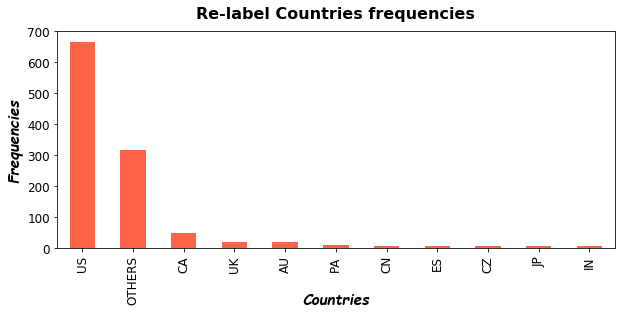

In [16]:
# Your code here

country_counts = dict(countries.value_counts())
top_10 = ["US", "CA", "UK", "AU", "PA", "CZ" ,"CN", "ES", "JP", "IN"]
for i in top_10:
    del country_counts[i]
    
for key, value in country_counts.items():
    country_counts[key] = 'OTHERS'
    
countries_relabel = countries.replace(country_counts)

plt.figure(figsize=[10,4])
plot_bar = countries_relabel.value_counts().plot.bar(color='tomato')
plt.title('Re-label Countries frequencies', size=16, weight='bold',y=1.03)

plt.sca(plot_bar)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,700)
label_prop = {'size':15,'weight':'bold','family':'fantasy','style':'oblique'}
plt.xlabel('Countries',fontdict=label_prop)
plot_bar.xaxis.set_label_coords(0.5, -0.2)
plt.ylabel('Frequencies',fontdict=label_prop)


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [17]:
# Your code here
# No need for me to drop columns, just join 'countries_relabel' with numerical cleaned data 'websites_num_noZero'
# This is done together with the rest of categorical data in next Challenge

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Besides `WHOIS_COUNTRY` which we already fixed, there are 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`. `URL` doesn't provide any useful information, thus is automatically discarded.

#### Print the unique value counts of `CHARSET` and conduct a data cleaning.

In [18]:
# Your code here
# Work only over the clean indexes already
charset = websites.CHARSET.loc[websites_num_noZero.index]
print(f"Value counts in CHARSET (only for numerical clean entries):\n{charset.value_counts()}")
# Modify labels consistently in CHARSET
mapping = {'utf-8':'UTF-8','ISO-8859-1':'ISO-8859','iso-8859-1':'ISO-8859',\
           'None':'Others','windows-1252':'Others','windows-1251':'Others'}
charset_relabel = charset.replace(mapping)
print(f"Value counts in CHARSET with consistent codes:\n{charset_relabel.value_counts()}")

Value counts in CHARSET (only for numerical clean entries):
UTF-8           430
ISO-8859-1      265
utf-8           238
us-ascii         96
iso-8859-1       86
None              5
windows-1252      1
ISO-8859          1
windows-1251      1
Name: CHARSET, dtype: int64
Value counts in CHARSET with consistent codes:
UTF-8       668
ISO-8859    352
us-ascii     96
Others        7
Name: CHARSET, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [19]:
# Your code here
# Work only over the clean indexes already
server = websites.SERVER.loc[websites_num_noZero.index]
print(f"Value counts in SERVER (only for numerical clean entries):\n{server.value_counts()}")

Value counts in SERVER (only for numerical clean entries):
Apache                                                                                220
nginx                                                                                 152
None                                                                                  109
Microsoft-HTTPAPI/2.0                                                                  69
cloudflare-nginx                                                                       58
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
Microsoft-IIS/8.0                                                                       1
Microsoft-IIS/7.0                                                                       1
mw2104.codfw.wmnet                                                                      1
Tengine                                  

As observed from above, there are mainly different versions of Apache, nginx and Microsoft that could be grouped.

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [20]:
# Your code here
server_list = ['Microsoft', 'Apache', 'nginx']
server_relabel = server.copy()
# check for NaN
point_nan = server_relabel.isna()
print(f"There are {point_nan.sum()} NaN values in my SERVER entries.")
# fill NaN as 'Others'
server_relabel.loc[point_nan] = 'Other'
idx_or = np.zeros(server_relabel.shape, dtype=bool)
for elem in server_list:
    idx = server_relabel.str.contains(elem,case=False)
    server_relabel.loc[idx] = elem
    idx_or = idx_or | idx
server_relabel.loc[~idx_or] = 'Other'

There are 1 NaN values in my SERVER entries.


In [21]:
# Count `SERVER` value counts here
print(f"Value counts in SERVER re-labeled:\n{server_relabel.value_counts()}")

Value counts in SERVER re-labeled:
Apache       395
Other        321
nginx        286
Microsoft    121
Name: SERVER, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [22]:
# Your code here
# Concatenate all cleaned categorical variables into one dataframe
categorical_clean = pd.concat([countries_relabel,charset_relabel,server_relabel],axis=1)
# Join categorical dataframe with numerical cleaned dataframe
websites_to_model = categorical_clean.join(websites_num_noZero,how='inner').reset_index(drop=True)
website_dummy = pd.get_dummies(websites_to_model,drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [23]:
# Your code here
print(website_dummy.info())
website_dummy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NUMBER_SPECIAL_CHARACTERS  1123 non-null   int64  
 1   TCP_CONVERSATION_EXCHANGE  1123 non-null   int64  
 2   DIST_REMOTE_TCP_PORT       1123 non-null   int64  
 3   REMOTE_IPS                 1123 non-null   int64  
 4   APP_BYTES                  1123 non-null   int64  
 5   SOURCE_APP_BYTES           1123 non-null   int64  
 6   DNS_QUERY_TIMES            1123 non-null   float64
 7   Type                       1123 non-null   int64  
 8   WHOIS_COUNTRY_CA           1123 non-null   uint8  
 9   WHOIS_COUNTRY_CN           1123 non-null   uint8  
 10  WHOIS_COUNTRY_CZ           1123 non-null   uint8  
 11  WHOIS_COUNTRY_ES           1123 non-null   uint8  
 12  WHOIS_COUNTRY_IN           1123 non-null   uint8  
 13  WHOIS_COUNTRY_JP           1123 non-null   uint8

,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHERS,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,CHARSET_Others,CHARSET_UTF-8,CHARSET_us-ascii,SERVER_Microsoft,SERVER_Other,SERVER_nginx
0,7,7,0,2,700,1153,2.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,6,17,7,4,1230,1265,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,6,31,22,3,3812,18784,8.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,6,57,2,5,4278,129889,4.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,7,11,6,9,894,838,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [24]:
# Your code here:
X = website_dummy.drop(columns='Type')
y = website_dummy.Type
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [25]:
# Your code here:
# set multi_class as a binary classification
log_reg = LogisticRegression(multi_class='ovr')

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [26]:
# Your code here:
# Normalize input data first
scaler = Normalizer().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = log_reg.fit(X_train_scaled, y_train)
# Ask Teachers about documentation: LogisticRegression applies L2 regularization by default?

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [27]:
# Your code here:
# Normalize X_test with scale from X_train
X_test_scaled = scaler.transform(X_test)
# score returns mean accuracy on test data against test labels (a.k.a accuracy_score)
model_score = model.score(X_test_scaled, y_test)
print(f"Accuracy score is: {round(model_score*100,2)} %.")
# fit test data using our model
y_pred = model.predict(X_test_scaled)
# confusion matrix, binary classification --> C[0,0]: true neg, C[0,1]: false neg, C[1,0]: false pos, C[1,1]: true pos
c_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix is:\nC={c_mat}.")

Accuracy score is: 85.78 %.
Confusion Matrix is:
C=[[193   0]
 [ 32   0]].


What are your thoughts on the performance of the model? Write your conclusions below.

Despite having a relatively high accuracy score of $85.78\,\%$, the model actually can't predict any true positives (malicious websites), which actually is the purpose of the model. Thus, the model doesn't serve it purposes.

It is observed a model that has basically learnt to classify every input as a benign website, a fact that could be explained by the unbalanced nature of the dataset. Indeed, this is the reason for it's high accuracy model, being the target test data mostly benign websites and the model itself unable to predict any true positives (malicious websites) at all.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [28]:
# Your code here:
knn_clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [29]:
# Your code here:
# test data predicted values
y_pred = knn_clf.predict(X_test_scaled)

# confusion matrix
c_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix is:\nC={c_mat}.")

# accuracy score
knn_score = knn_clf.score(X_test_scaled, y_test)
print(f"Accuracy score is: {round(knn_score*100,2)} %.")

Confusion Matrix is:
C=[[185   8]
 [ 24   8]].
Accuracy score is: 85.78 %.


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [30]:
# Your code here:
kn5_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
kn5_clf.fit(X_train_scaled, y_train)

# test data predicted values
y_pred = kn5_clf.predict(X_test_scaled)

# confusion matrix
c_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix is:\nC={c_mat}.")

# accuracy score
kn5_score = kn5_clf.score(X_test_scaled, y_test)
print(f"Accuracy score is: {round(kn5_score*100,2)} %.")

Confusion Matrix is:
C=[[186   7]
 [ 22  10]].
Accuracy score is: 87.11 %.


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

When increasing *n_neighbors* from 3 to 5, we observe an improvement in the accuracy score. With respect to the confusion matrix, we observe that the improvement is bigger in the predictions of true positives compared to true negatives.

In general, we observe that *KNeighborsClassifier* is better suited to handle the unbalanced nature of the dataset in the binary classification compared to the logistic regression approach.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [31]:
# Your code here
# set multi_class as a binary classification
log_reg = LogisticRegression(multi_class='ovr')

# Standarize input data with robust scaler (non-sensitive to outliers)
rob_scaler = RobustScaler().fit(X_train)
X_train_rob_scale = rob_scaler.transform(X_train)
model_rob = log_reg.fit(X_train_rob_scale, y_train)

# Standarize X_test with robust scale from X_train
X_test_rob_scale = rob_scaler.transform(X_test)

# fit test data using model with robust scaler
y_pred = model_rob.predict(X_test_rob_scale)

# accuracy score
acc_score = model_rob.score(X_test_rob_scale, y_test)
print(f"Accuracy score is: {round(acc_score*100,2)} %.")

# confusion matrix
c_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix is:\nC={c_mat}.")

Accuracy score is: 88.89 %.
Confusion Matrix is:
C=[[189   4]
 [ 21  11]].


Definitely the logistic regression works better with a robust scaler. With respect to accuracy score the change is not significant. The noticeable difference is observed in the confusion matrix, where non-zero true positives are captured. However, the accuracy to capture these is still very low, which shows the problem of unbalanced data.

Another insight gained from this lab is that the logistic regression is performing better using the whole numeric features without cleaning outliers and applying a robust scaling method rather than removing outliers from the numeric features fed into the machine learning algorithm. This is an important aspect to consider, if we don't want to depend on the user knowledge and reduce data pre-processing time previous to the machine learning computations.